In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from pathlib import Path
import pandas as pd

BASE_DIR = Path().resolve().parents[0]  
DATA_DIR = BASE_DIR / "data"
excel_path = DATA_DIR / "DANE.xlsx"

df = pd.read_excel(excel_path)

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["axes.grid"] = True

df_clean = df.copy()
df.head()

,adress,type,name,context,Lat,Lon,plane_height,plane_length,plane_area,plane_body_area,...,symm opp naj,symm opp cz dach,symm opp dach,osie liczba,osie parzystość,grupy liczba,osie rytmy,dominant_count,dominant_symmetry,dominant_shape
0,chlodna 13,pierzejowa,NaN,boczna,54.343569,18.663818,15.75,14.15,191.98,167.56,...,nie dotyczy,tak,tak,6,parzyste,4,okresowy,2,tak,prostokąt+trójkąt
1,chlodna 15,pierzejowa,NaN,boczna,54.343705,18.663302,16.88,12.53,171.94,153.28,...,nie dotyczy,tak,nie,5,nieparzyste,3,swobodny,1,nie,prostokąt+trójkąt
2,chlodna 3a,pierzejowa,NaN,boczna,54.343342,18.664006,14.73,14.67,216.16,216.16,...,nie dotyczy,nie dotyczy,nie dotyczy,8,parzyste,2,okresowy,0,nie dotyczy,nie dotyczy
3,chlodna 7a,pierzejowa,NaN,boczna,54.343027,18.665274,14.86,13.62,202.36,202.36,...,nie dotyczy,nie dotyczy,nie,6,parzyste,3,okresowy,0,nie dotyczy,nie dotyczy
4,dobra 4,pierzejowa,NaN,boczna,54.340513,18.653343,15.14,13.18,199.56,199.56,...,nie dotyczy,nie dotyczy,tak,6,parzyste,3,swobodny,0,nie dotyczy,nie dotyczy


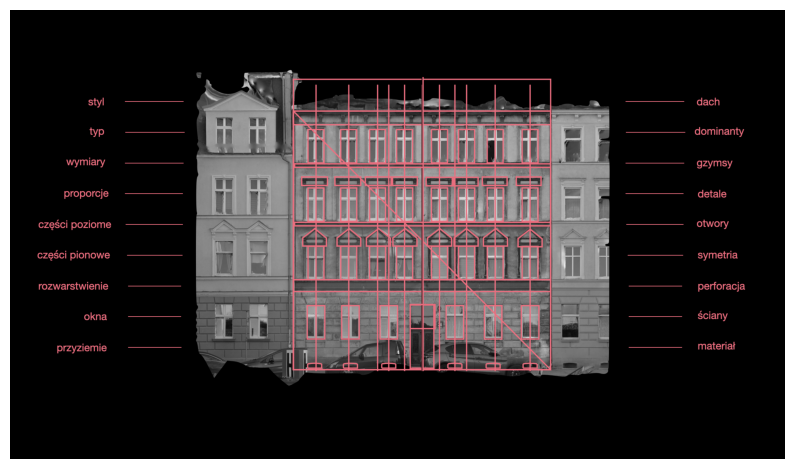

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(BASE_DIR / "data"/"cechy.png")

plt.imshow(img)
plt.axis("off")
plt.show()

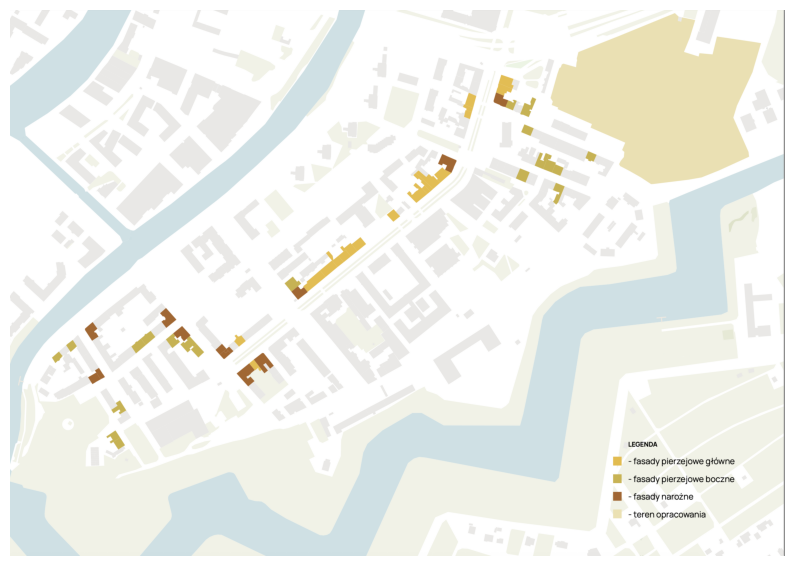

In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(BASE_DIR / "data"/"proba badawcza.png")

plt.imshow(img)
plt.axis("off")
plt.show()

In [54]:
description_cols = ["adress", "type", "name", "context","lat","lon"]

for col in description_cols:
    cat_col = col + "_cat"
    if cat_col in df_clean.columns:
        df_clean.drop(columns=[cat_col], inplace=True)

In [55]:
derived_cols = [
    "plane_area",
    "proportions_facade_angle",
    "proportions_facade_body_angle",
    "horizontal_roof_area",
    "horizontal_top_area",
    "horizontal_upper_area",
    "horizontal_ground_area",
    "belt_top",
    "belt_top_area",
    "belt_groundscape_height_percent",
    "belt_groundscape_length_percent",
    "vertical_area_percent",
    "openings_perforation",
    "windows_perforation_ground",
    "windows_perforation_upper",
    "Lat",
    "Lon",
]

df_clean = df.drop(columns=[c for c in derived_cols if c in df.columns])

In [56]:
binary_map = {
    "tak": 1, "nie": 0,
    "Tak": 1, "Nie": 0,
    "TAK": 1, "NIE": 0,
    True: 1, False: 0
}

binary_cols = []

object_cols = [
    c for c in df_clean.select_dtypes(include=["object"]).columns
    if c not in description_cols
]

for col in object_cols:
    unique_vals = set(df_clean[col].dropna().unique())
    if len(unique_vals) > 0 and unique_vals.issubset(binary_map.keys()):
        df_clean[col] = df_clean[col].map(binary_map)
        binary_cols.append(col)


In [57]:
categorical_cols = []

for col in df_clean.select_dtypes(include=["object"]).columns:
    if col not in binary_cols:
        if df_clean[col].nunique(dropna=True) > 1:
            categorical_cols.append(col)
            df_clean[col + "_cat"] = df_clean[col].astype("category").cat.codes

In [58]:
numeric_cols = df_clean.select_dtypes(include=["number"]).columns.tolist()
X_num = df_clean[numeric_cols]

In [59]:
low_var_cols = X_num.var()[X_num.var() < 0.01].index.tolist()
X_num = X_num.drop(columns=low_var_cols)
numeric_cols = X_num.columns.tolist()

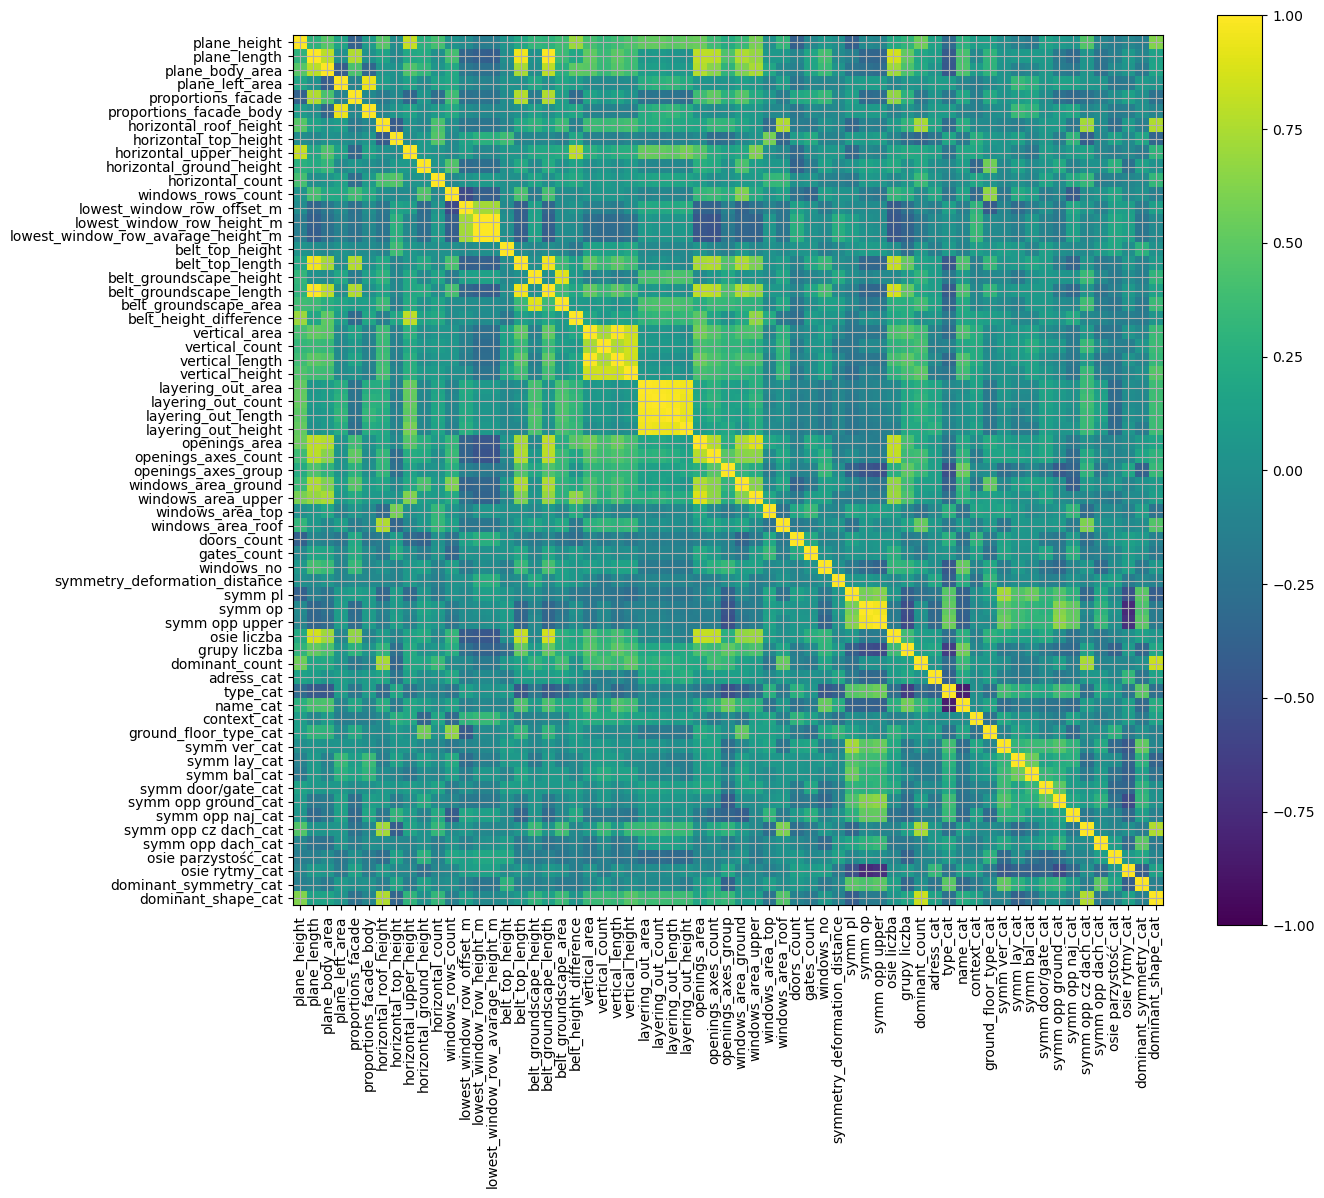

In [60]:
corr = X_num.corr()

plt.figure(figsize=(14,12))
plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.tight_layout()
plt.show()

In [61]:
high_corr_pairs = []
for i, c1 in enumerate(numeric_cols):
    for j, c2 in enumerate(numeric_cols):
        if j <= i: 
            continue
        if abs(corr.loc[c1, c2]) > 0.9:
            high_corr_pairs.append((c1, c2, corr.loc[c1, c2]))

high_corr_pairs

[('plane_length', 'belt_top_length', np.float64(0.9574742980358637)),
 ('plane_length', 'belt_groundscape_length', np.float64(0.9999992836329885)),
 ('plane_left_area',
  'proportions_facade_body',
  np.float64(0.9441454697117915)),
 ('lowest_window_row_height_m',
  'lowest_window_row_avarage_height_m',
  np.float64(0.9987648477236648)),
 ('belt_top_length',
  'belt_groundscape_length',
  np.float64(0.9575092275589172)),
 ('belt_groundscape_height',
  'belt_groundscape_area',
  np.float64(0.9075459100051476)),
 ('vertical_area', 'vertical_length', np.float64(0.988404965591622)),
 ('layering_out_area', 'layering_out_count', np.float64(0.9890814717349027)),
 ('layering_out_area', 'layering_out_length', np.float64(0.973512357546137)),
 ('layering_out_area', 'layering_out_height', np.float64(0.9575392595820076)),
 ('layering_out_count', 'layering_out_length', np.float64(0.9786962102587861)),
 ('layering_out_count', 'layering_out_height', np.float64(0.9398131441429308)),
 ('layering_out_len

In [62]:
cols_to_remove_after_corr = [
    "belt_top_length",
    "belt_groundscape_length",
    "proportions_facade_body",
    "lowest_window_row_avarage_height_m",
    "belt_groundscape_area",
    "vertical_area",
    "vertical_count",
    "layering_out_area",
    "layering_out_length",
    "symm opp upper",
    "adress_cat",
    "type_cad",
    "name_cat",
    "context_cat",
]

cols_to_remove_after_corr = [c for c in cols_to_remove_after_corr if c in numeric_cols]

feature_cols_final = [c for c in numeric_cols if c not in cols_to_remove_after_corr]

X_final = df_clean[feature_cols_final]

In [63]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X_final)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [64]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df_clean["cluster"] = labels
df_clean[["cluster"]].head()
df_clean["cluster"].value_counts()

cluster
2    24
0    13
3    13
1    10
Name: count, dtype: int64

In [65]:
import optuna
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def objective(trial):
    n_clusters = trial.suggest_int("n_clusters", 2, 10)
    n_init = trial.suggest_int("n_init", 10, 50)
    max_iter = trial.suggest_int("max_iter", 100, 500)

    kmeans = KMeans(
        n_clusters=n_clusters,
        n_init=n_init,
        max_iter=max_iter,
        random_state=42
    )
    labels = kmeans.fit_predict(X_scaled)

    score = silhouette_score(X_scaled, labels)
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

best_params = study.best_params
best_score = study.best_value

print("Najlepsze parametry:", best_params)
print("Najlepszy silhouette_score:", best_score)

[I 2025-11-28 21:50:25,252] A new study created in memory with name: no-name-718ad32f-81a6-41ab-9378-bbab80b03d3c
[I 2025-11-28 21:50:25,336] Trial 6 finished with value: 0.11335891932278473 and parameters: {'n_clusters': 3, 'n_init': 12, 'max_iter': 347}. Best is trial 6 with value: 0.11335891932278473.
[I 2025-11-28 21:50:25,364] Trial 5 finished with value: 0.12400806601195061 and parameters: {'n_clusters': 2, 'n_init': 21, 'max_iter': 281}. Best is trial 5 with value: 0.12400806601195061.
[I 2025-11-28 21:50:25,371] Trial 7 finished with value: 0.10632274125788073 and parameters: {'n_clusters': 4, 'n_init': 20, 'max_iter': 217}. Best is trial 5 with value: 0.12400806601195061.
[I 2025-11-28 21:50:25,381] Trial 3 finished with value: 0.11777143208163589 and parameters: {'n_clusters': 7, 'n_init': 20, 'max_iter': 197}. Best is trial 5 with value: 0.12400806601195061.
[I 2025-11-28 21:50:25,442] Trial 2 finished with value: 0.10598173434597354 and parameters: {'n_clusters': 8, 'n_init

Najlepsze parametry: {'n_clusters': 7, 'n_init': 46, 'max_iter': 485}
Najlepszy silhouette_score: 0.12878950819317742


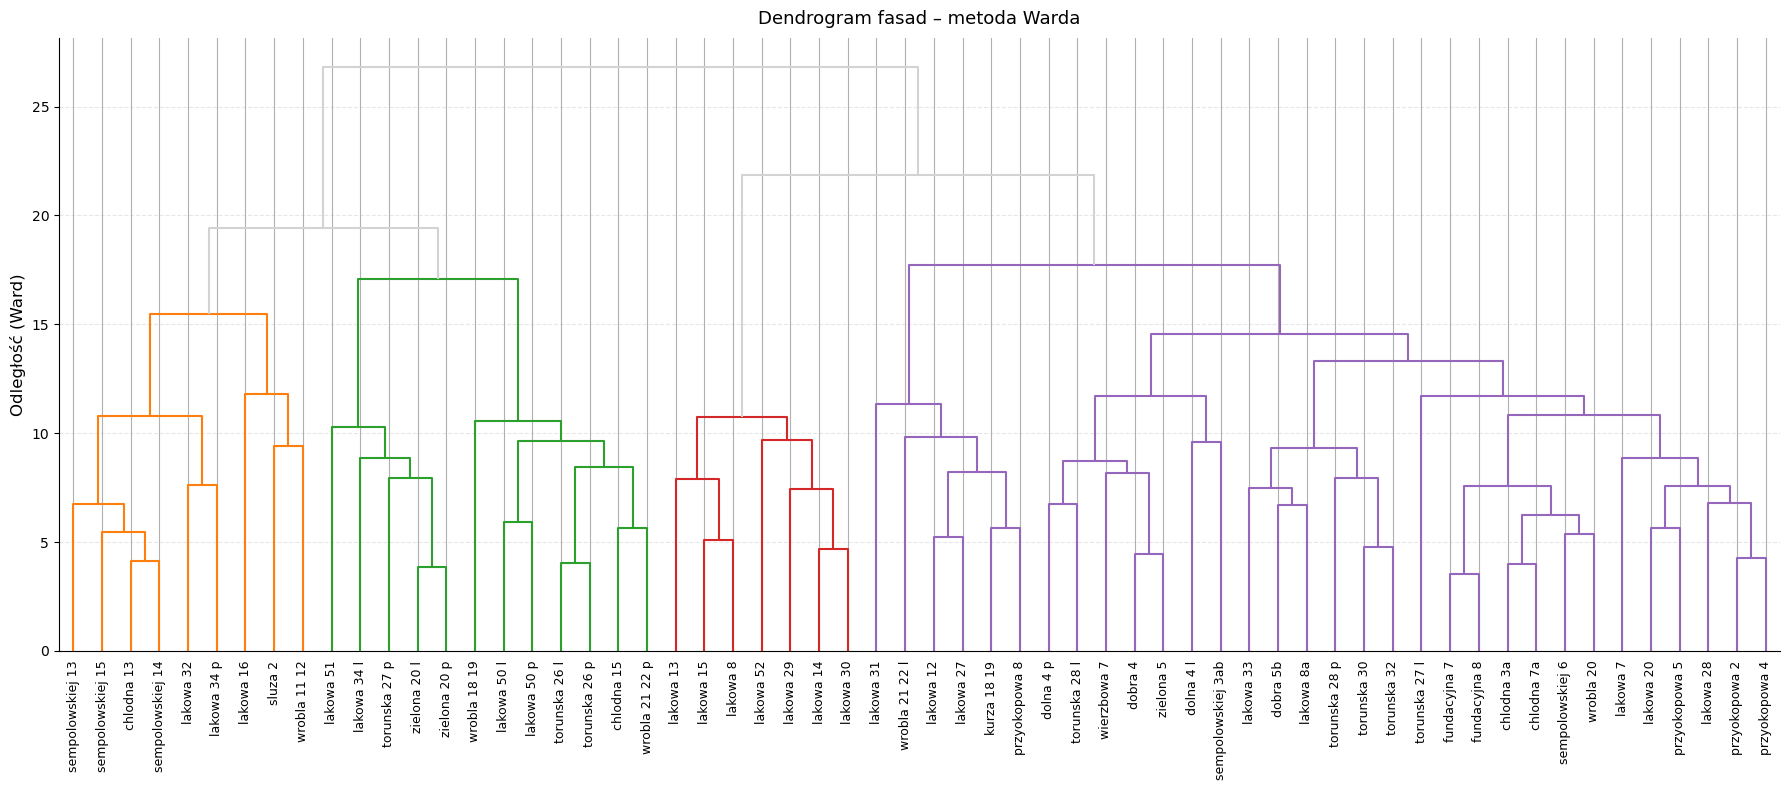

In [66]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X_scaled, method="ward")
labels = df_clean["adress"].values

plt.figure(figsize=(18, 8))

plt.title("Dendrogram fasad – metoda Warda", fontsize=13, pad=10)
plt.ylabel("Odległość (Ward)", fontsize=12)

threshold = 0.7 * linked[:, 2].max()

dend = dendrogram(
    linked,
    labels=labels,
    leaf_rotation=90,
    leaf_font_size=9,
    color_threshold=threshold,      
    above_threshold_color="lightgrey"  
)

ax = plt.gca()
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

In [67]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from tqdm import tqdm      
import matplotlib.pyplot as plt


X = X_scaled          
k = 7               
B = 100          

n = X.shape[0]
co_matrix = np.zeros((n, n))

for b in tqdm(range(B), desc="Bootstrap Ward"):
    idx = np.random.choice(np.arange(n), size=n, replace=True)
    X_boot = X[idx]

    Z_boot = linkage(X_boot, method='ward')
    labels_boot = fcluster(Z_boot, k, criterion='maxclust')

    for i_new, i_old in enumerate(idx):
        for j_new, j_old in enumerate(idx):
            if labels_boot[i_new] == labels_boot[j_new]:
                co_matrix[i_old, j_old] += 1

stability = co_matrix / B

Z_full = linkage(X, method='ward')
labels_full = fcluster(Z_full, k, criterion='maxclust')

cluster_stability = []
for cluster_id in range(1, k + 1):
    idx_cluster = np.where(labels_full == cluster_id)[0]
    sub = stability[np.ix_(idx_cluster, idx_cluster)]
    cluster_stability.append(sub.mean())

print("Stabilność klastrów:")
for i, s in enumerate(cluster_stability, start=1):
    print(f"  Klaster {i}: {s:.3f}")

Bootstrap Ward: 100%|██████████| 100/100 [00:00<00:00, 1172.51it/s]

Stabilność klastrów:
  Klaster 1: 1.000
  Klaster 2: 0.983
  Klaster 3: 1.041
  Klaster 4: 0.846
  Klaster 5: 1.034
  Klaster 6: 0.807
  Klaster 7: 0.484


In [68]:
from scipy.cluster.hierarchy import fcluster
import numpy as np

clusters = fcluster(linked, t=15, criterion='distance')

unique_clusters = np.unique(clusters)
print("Liczba klastrów:", len(unique_clusters))
print("Numery klastrów:", unique_clusters)

df_clean["cluster"] = clusters
df_clean[["adress", "cluster"]].head(60)

Liczba klastrów: 7
Numery klastrów: [1 2 3 4 5 6 7]


,adress,cluster
0,chlodna 13,1
1,chlodna 15,4
2,chlodna 3a,7
3,chlodna 7a,7
4,dobra 4,7
5,dobra 5b,7
6,dolna 4 l,7
7,dolna 4 p,7
8,fundacyjna 7,7
9,fundacyjna 8,7


In [69]:
df_clean["cluster"].value_counts()


cluster
7    26
4     7
5     7
1     6
6     6
3     5
2     3
Name: count, dtype: int64

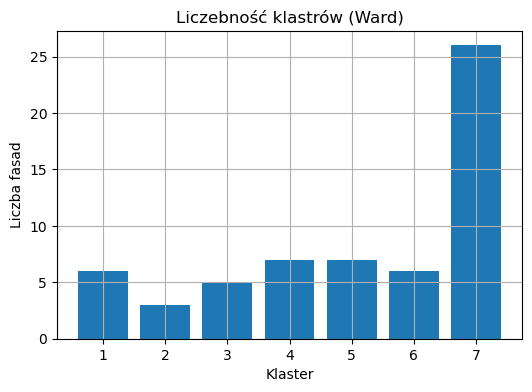

In [70]:
counts = df_clean["cluster"].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel("Klaster")
plt.ylabel("Liczba fasad")
plt.title("Liczebność klastrów (Ward)")
plt.show()

In [71]:
cluster_profile = df_clean.groupby("cluster")[feature_cols_final].mean()
cluster_profile

,plane_height,plane_length,plane_body_area,plane_left_area,proportions_facade,horizontal_roof_height,horizontal_top_height,horizontal_upper_height,horizontal_ground_height,horizontal_count,...,symm bal_cat,symm door/gate_cat,symm opp ground_cat,symm opp naj_cat,symm opp cz dach_cat,symm opp dach_cat,osie parzystość_cat,osie rytmy_cat,dominant_symmetry_cat,dominant_shape_cat
cluster,,,,,,,,,,,,,,,,,,,,,
1,17.595000,15.615000,185.275000,51.673333,0.888333,4.073333,0.000000,8.308333,5.211667,3.000000,...,1.000000,1.333333,2.000000,1.000000,2.000000,1.333333,0.500000,0.333333,1.666667,2.500000
2,19.796667,17.120000,196.460000,209.216667,0.863333,1.366667,0.883333,13.453333,5.083333,3.000000,...,1.666667,1.666667,2.000000,1.666667,1.333333,1.333333,0.000000,0.000000,1.333333,0.666667
3,20.722000,15.596000,268.492000,12.776000,0.752000,2.630000,0.000000,13.528000,4.564000,2.800000,...,0.200000,0.800000,0.800000,1.000000,2.000000,1.200000,0.400000,1.600000,0.400000,3.000000
4,18.167143,17.991429,260.562857,16.378571,0.995714,3.680000,0.000000,9.590000,4.898571,3.000000,...,1.000000,0.285714,0.571429,1.000000,1.714286,0.285714,0.571429,1.428571,0.000000,2.000000
5,13.010000,9.941429,128.752857,3.252857,0.782857,0.000000,1.437143,7.572857,4.000000,2.857143,...,1.000000,0.857143,0.857143,1.857143,1.000000,1.000000,0.571429,1.142857,1.000000,0.000000
6,15.225000,22.253333,338.931667,0.010000,1.488333,0.000000,0.390000,10.310000,4.525000,2.166667,...,1.333333,1.333333,1.333333,1.166667,1.000000,0.833333,0.000000,0.666667,1.000000,0.000000
7,15.009231,15.410769,223.712692,3.483462,1.050769,0.000000,0.943462,9.022308,5.237308,2.538462,...,0.884615,0.692308,1.038462,1.076923,1.000000,1.230769,0.884615,0.961538,1.115385,0.192308


In [72]:
#wartosci zestandaryzowane
#0 = średnia całej cechy
#+1 = powyżej średniej
#+2 = dużo powyżej
#–1 = poniżej średniej
#–2 = dużo poniżej

df_scaled = pd.DataFrame(
    X_scaled,
    columns=feature_cols_final
)

df_scaled["cluster"] = df_clean["cluster"].values

cluster_profile_scaled = df_scaled.groupby("cluster").mean()
cluster_profile_scaled

,plane_height,plane_length,plane_body_area,plane_left_area,proportions_facade,horizontal_roof_height,horizontal_top_height,horizontal_upper_height,horizontal_ground_height,horizontal_count,...,symm bal_cat,symm door/gate_cat,symm opp ground_cat,symm opp naj_cat,symm opp cz dach_cat,symm opp dach_cat,osie parzystość_cat,osie rytmy_cat,dominant_symmetry_cat,dominant_shape_cat
cluster,,,,,,,,,,,,,,,,,,,,,
1,0.467294,-0.061062,-0.465492,0.390044,-0.374393,1.630344,-0.672870,-0.468212,0.403799,0.680746,...,0.108042,0.520939,0.897018,-0.310013,1.474021,0.392232,-0.204124,-0.729711,1.157767,1.335037
2,1.174391,0.286600,-0.340651,2.360840,-0.453713,0.134058,0.228143,1.435344,0.228630,0.680746,...,1.548607,0.880208,0.897018,0.817307,0.102839,0.392232,-1.224745,-1.124149,0.606450,-0.148337
3,1.471575,-0.065451,0.463330,-0.096545,-0.806954,0.832448,-0.672870,1.462969,-0.480236,0.250801,...,-1.620635,-0.053890,-0.321572,-0.310013,1.474021,0.196116,-0.408248,0.769154,-0.937240,1.739594
4,0.651046,0.487905,0.374830,-0.051478,-0.033692,1.412904,-0.672870,0.005981,-0.023562,0.680746,...,0.108042,-0.608190,-0.553685,-0.310013,0.886371,-1.148680,-0.058321,0.566301,-1.598822,0.930480
5,-1.005244,-1.371687,-1.096361,-0.215675,-0.709050,-0.621456,0.793038,-0.740325,-1.250069,0.373642,...,0.108042,0.007699,-0.263544,1.139398,-0.582752,-0.098058,-0.058321,0.228211,0.055132,-0.687746
6,-0.293865,1.472427,1.249539,-0.256242,1.529299,-0.621456,-0.275064,0.272368,-0.533469,-1.110690,...,0.828325,0.520939,0.220023,-0.028183,-0.582752,-0.343203,-1.224745,-0.335272,0.055132,-0.687746
7,-0.363163,-0.108241,-0.036472,-0.212790,0.140987,-0.621456,0.289475,-0.204054,0.438797,-0.311434,...,-0.141286,-0.169962,-0.079417,-0.179938,-0.582752,0.241374,0.580969,0.013654,0.245973,-0.532148


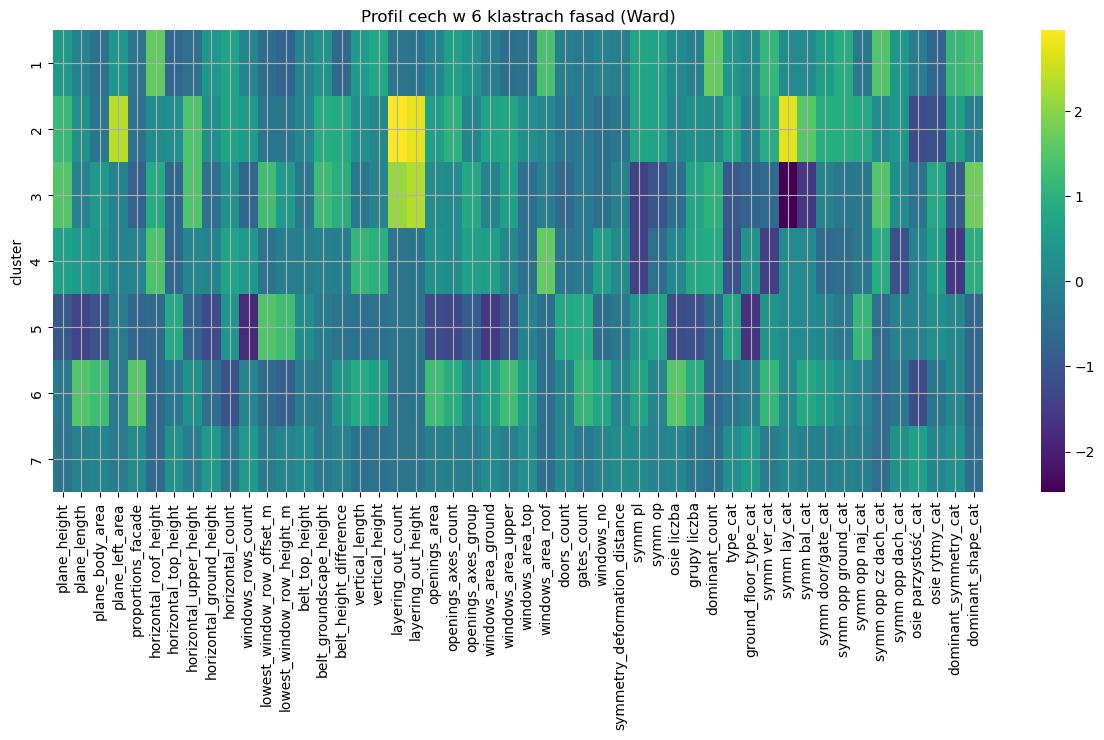

In [73]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.heatmap(cluster_profile_scaled, cmap="viridis")
plt.title("Profil cech w 6 klastrach fasad (Ward)")
plt.show()

In [74]:
from sklearn.decomposition import PCA
import plotly.express as px

palette = ["#e41a1c", "#377eb8", "#4daf4a",
           "#984ea3", "#ff7f00", "#ffff33"]

cluster_ids = sorted(df_clean["cluster"].unique())

cluster_labels = {
    1: "Klasa 1 - fasady z czescia dachowa i dominantami",
    2: "Klasa 2 - fasady monumentalne, z wykuszami , wysokimi gzysmami, o umiarkowanej perforacji",
    3: "Klasa 3 - fasady pionowe, wysokie z czescia dachowa o umiarkowanej perforacji, z niesymetrycznymi wykuszami",
    4: "Klasa 4 - fasady z ryzalitami i czescia dachowa z oknami, niesymetryczne",
    5: "Klasa 5 - fasady niskie, bez czesci dachowej, proste",
    6: "Klasa 6 - fasady dlugie z ryzalitami z niskim gzymsem przyziemia, dosc symetryczne",
    7: "Klasa 7 - fasady o sredniej wysokosci, zazwyczaj kwadratowe i wysokim przyziemiu tzw. sredniaki/typowe"
}

for cl in cluster_ids:
    if cl not in cluster_labels:
        cluster_labels[cl] = f"Klaster {cl}"

df_clean["cluster_label"] = df_clean["cluster"].map(cluster_labels)

color_map = {
    cluster_labels[cl]: palette[i % len(palette)]
    for i, cl in enumerate(cluster_ids)
}

pca3 = PCA(n_components=3)
coords3 = pca3.fit_transform(X_scaled)

df_clean["pca1"] = coords3[:, 0]
df_clean["pca2"] = coords3[:, 1]
df_clean["pca3"] = coords3[:, 2]

fig = px.scatter_3d(
    df_clean,
    x="pca1",
    y="pca2",
    z="pca3",
    color="cluster_label",
    color_discrete_map=color_map,
    hover_data=["adress", "type", "context", "cluster"]
)

fig.update_layout(
    scene=dict(
        xaxis_title="PCA 1",
        yaxis_title="PCA 2",
        zaxis_title="PCA 3"
    ),
    title="PCA 3D – wizualizacja klastrów",
    legend_title="Typ klastra"
)

fig.show()

In [75]:
import folium

Lat = df["Lat"]
Lon = df["Lon"]

df["cluster"] = df_clean["cluster"].values

m = folium.Map(
    location=[Lat.mean(), Lon.mean()],
    zoom_start=13,
    tiles="CartoDB.VoyagerNoLabels"
)

cluster_ids = sorted(df["cluster"].unique())
palette = ["#e41a1c","#377eb8","#4daf4a","#984ea3","#ff7f00","#ffff33"]
color_map = {cl: palette[i % len(palette)] for i, cl in enumerate(cluster_ids)}

# --- rysowanie punktów ---
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Lat"], row["Lon"]],
        radius=5,
        weight=1,
        color=color_map[row["cluster"]],
        fill=True,
        fill_color=color_map[row["cluster"]],
        fill_opacity=0.9,
        popup=(
            f"Adres: {row.get('adress','brak')}<br>"
            f"Typ: {row.get('type','brak')}<br>"
            f"Kontekst: {row.get('context','brak')}<br>"
            f"Klastr: {row['cluster']}"
        )
    ).add_to(m)

m
